# 1. Pandas 시각화
Pandas는 자체적으로 matplotlib 를 기반으로 한 시각화기능을 지원한다.    
Series나 DataFrame에 plot() 함수나 plot accessor를 사용한다.
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

- 기본 구문
    - (Sereis/DataFrame Instance).plot(kind = "그래프 종류")
    - (Sereis/DataFrame Instance).plot.그래프_함수()

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1.1. plot() 
- kind 매개변수에 지정한 값에 따라 다양한 그래프를 그릴 수 있다.
- kind : 그래프 종류 지정
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot

In [4]:
s = pd.Series([100, 70, 90, 130, 50], index = ['사과', '배', '귤', '수박', '복숭아'])

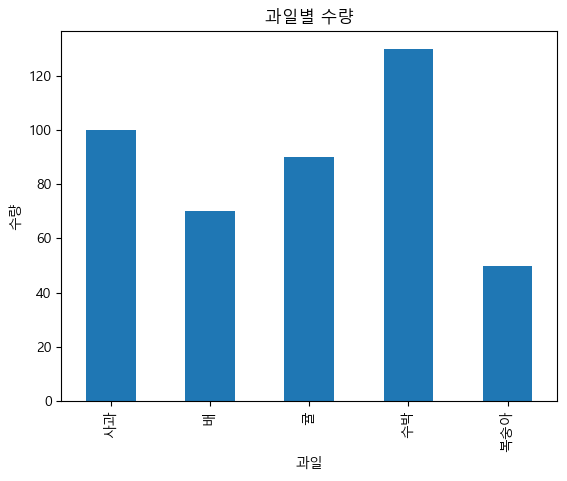

In [6]:
s.plot(kind = 'bar')

plt.title('과일별 수량')
plt.xlabel('과일')
plt.ylabel('수량')

plt.show()

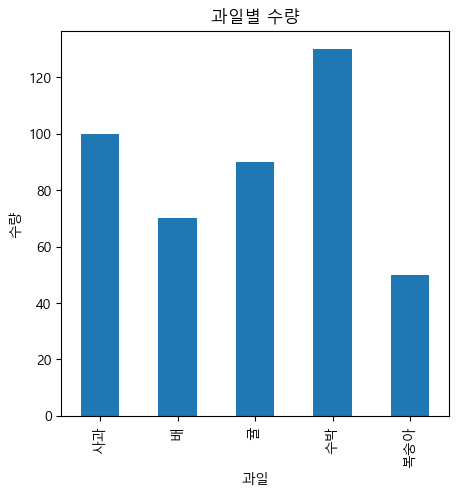

In [9]:
s.plot(kind = 'bar', title = '과일별 수량', xlabel = '과일', ylabel = '수량', figsize = (5, 5))
plt.show()

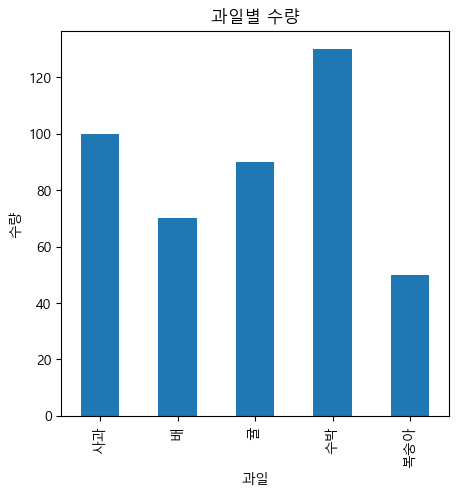

In [10]:
s.plot.bar(title = '과일별 수량', xlabel = '과일', ylabel = '수량', figsize = (5, 5))
plt.show()

## 1.2. 막대 그래프
- index가 무슨 값인지를 가리키는 축으로 사용된다.

In [11]:
# 먼저 data를 불러온다.
tips = pd.read_csv('data/tips.csv')

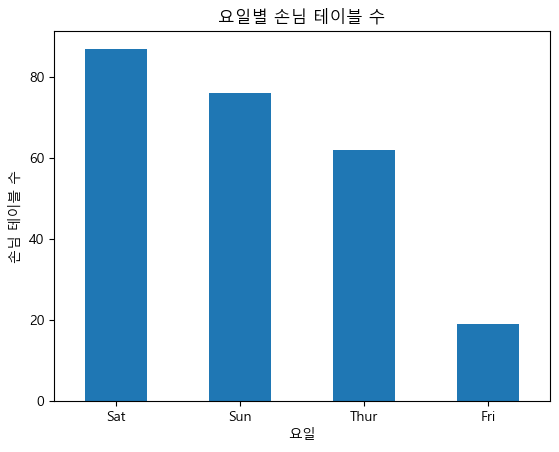

In [16]:
cnt_result = tips['day'].value_counts()

cnt_result.plot(kind = 'bar', title = '요일별 손님 테이블 수', xlabel = '요일', ylabel = '손님 테이블 수', rot = 0)
plt.show()

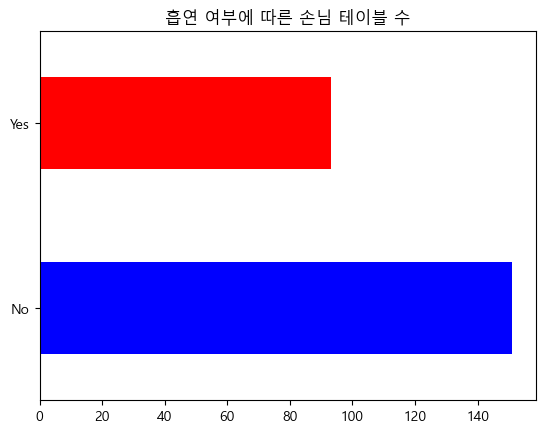

In [17]:
smoker = tips['smoker'].value_counts()
smoker.plot(kind = 'barh', title = '흡연 여부에 따른 손님 테이블 수', color = ['blue', 'red'])
plt.show()

- 두개의 분류 별로 그리기
    - 여러개의 컬럼일 경우 수평 누적 막대그래프를 그린다.


In [18]:
# 흡연 여부와 성별에 따른 손님 테이블 수 DataFrame을 생성한다.

agg_df = tips.pivot_table(index = 'smoker', columns = 'sex', values = 'tip', aggfunc = 'count')

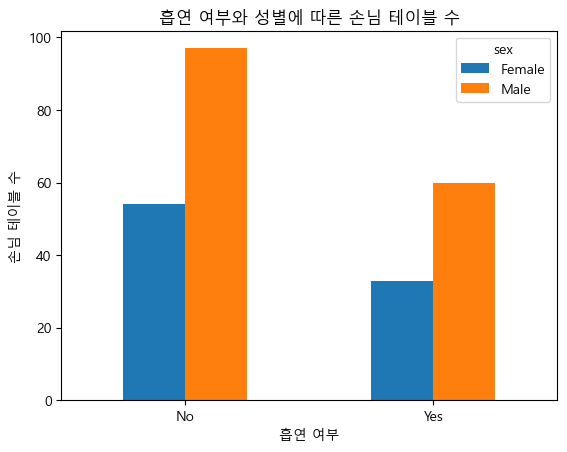

In [21]:
agg_df.plot(kind = 'bar', title = '흡연 여부와 성별에 따른 손님 테이블 수', xlabel = '흡연 여부', ylabel = '손님 테이블 수', rot = 0)
plt.show()

In [30]:
day_sex_size = tips.pivot_table(index = 'day', columns = 'sex', values = 'size', aggfunc = 'sum')
day_sex_size

sex,Female,Male
day,,
Fri,19,21
Sat,63,156
Sun,53,163
Thur,79,73


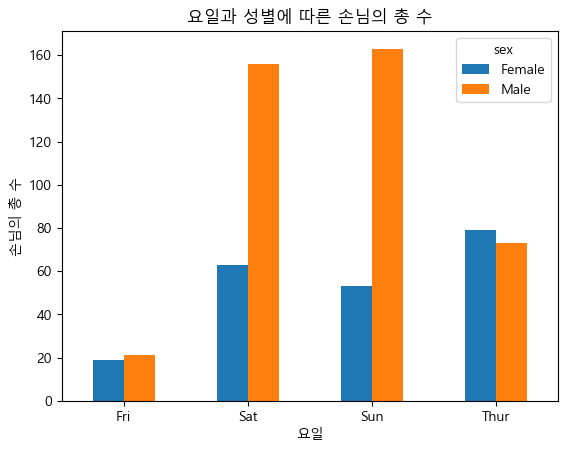

In [31]:
day_sex_size.plot(kind = 'bar', title = '요일과 성별에 따른 손님의 총 수', xlabel = '요일', ylabel = '손님의 총 수', rot = 0)
plt.show()

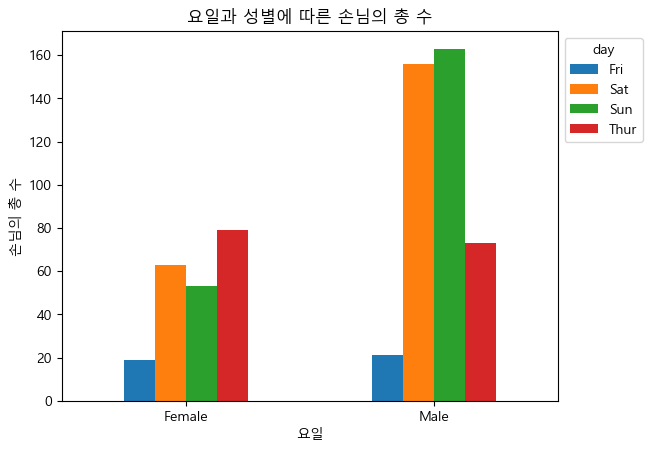

In [34]:
day_sex_size = tips.pivot_table(index = 'sex', columns = 'day', values = 'size', aggfunc = 'sum')
day_sex_size.plot(kind = 'bar', title = '요일과 성별에 따른 손님의 총 수', xlabel = '요일', ylabel = '손님의 총 수', rot = 0)
plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left', title = 'day')
plt.show()

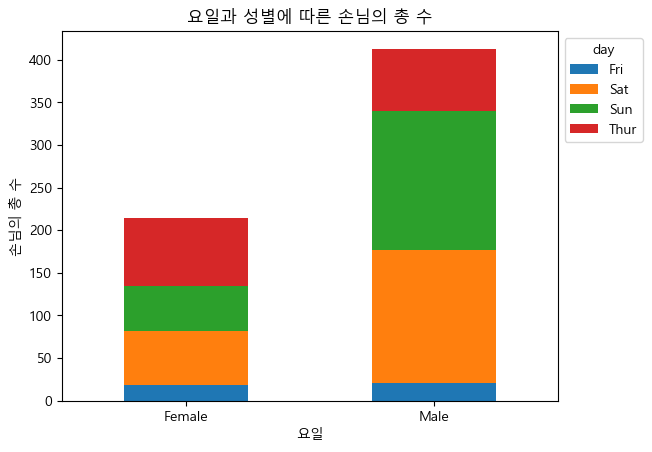

In [35]:
day_sex_size = tips.pivot_table(index = 'sex', columns = 'day', values = 'size', aggfunc = 'sum')
day_sex_size.plot(kind = 'bar', title = '요일과 성별에 따른 손님의 총 수', xlabel = '요일', ylabel = '손님의 총 수', rot = 0, stacked = True)
plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left', title = 'day')
plt.show()

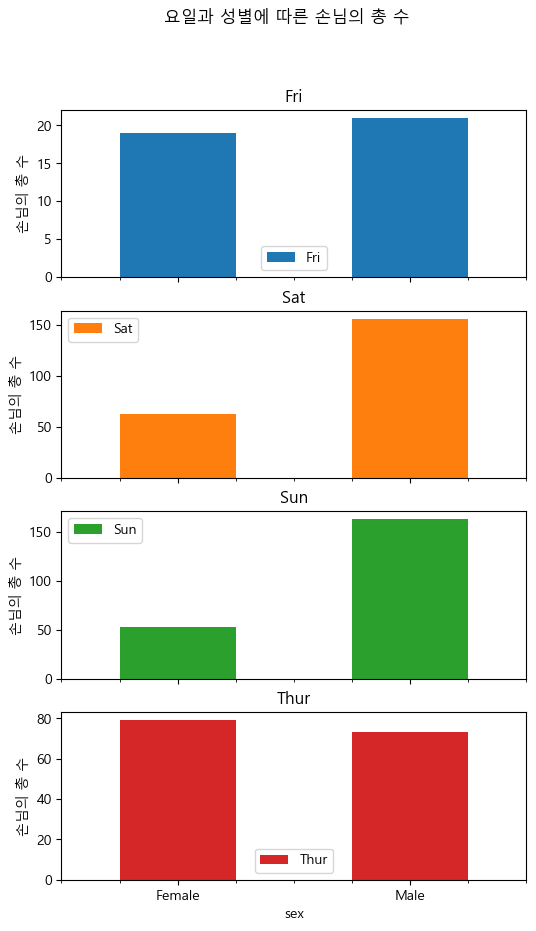

In [38]:
day_sex_size = tips.pivot_table(index = 'sex', columns = 'day', values = 'size', aggfunc = 'sum')

day_sex_size.plot(kind = 'bar', title = '요일과 성별에 따른 손님의 총 수', ylabel = '손님의 총 수', rot = 0,
                 subplots = True, figsize = (6, 10))
plt.legend()
plt.show()

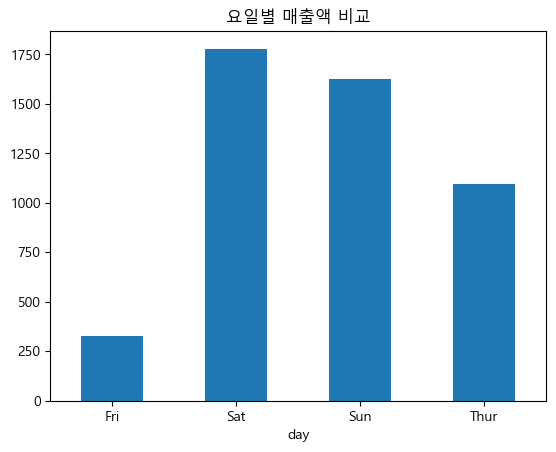

In [41]:
tips.groupby('day')['total_bill'].sum().plot(kind = 'bar', title = '요일별 매출액 비교', rot = 0)
plt.show()

## 1.3. 파이차트

In [48]:
# index가 label이 되고 value는 계산한 비율 값이 된다.
day_count

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

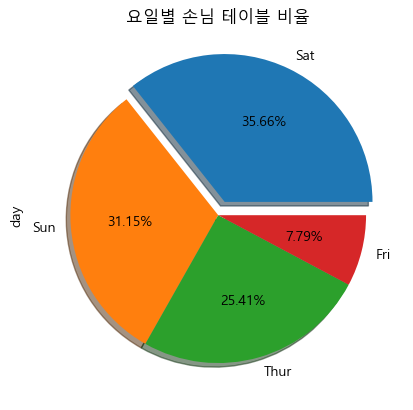

In [49]:
# pie cahrt에 사용할 data를 불러온다. 요일별 손님 테이블 비율을 pie chart로 그려보자.
day_count = tips['day'].value_counts()
day_count.plot(kind = 'pie', autopct = '%.2f%%', title = '요일별 손님 테이블 비율', explode = [0.1, 0, 0, 0], shadow = True)
plt.show()

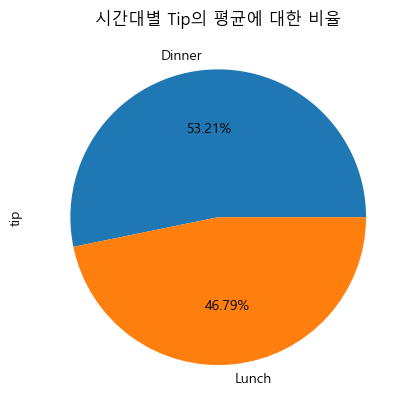

In [52]:
# 시간대별 tip의 평균을 pie chart로 그려보자.

time_tip_mean = tips.groupby('time')['tip'].mean()

time_tip_mean.plot(kind = 'pie', autopct = '%.2f%%', title = '시간대별 Tip의 평균에 대한 비율')
plt.show()

## 1.4. 히스토그램, KDE(밀도그래프)

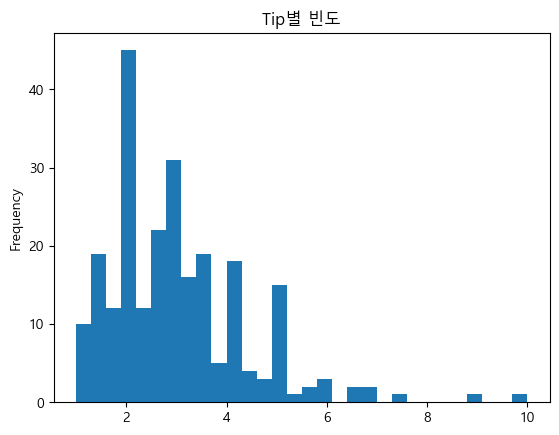

In [56]:
tip = tips['tip']

tip.plot(kind = 'hist', bins = 30, title = 'Tip별 빈도', xlabel = 'Tip', ylabel = '빈도')
plt.show()

In [57]:
!pip install scipy

     --------------------------------------- 42.5/42.5 MB 34.4 MB/s eta 0:00:00


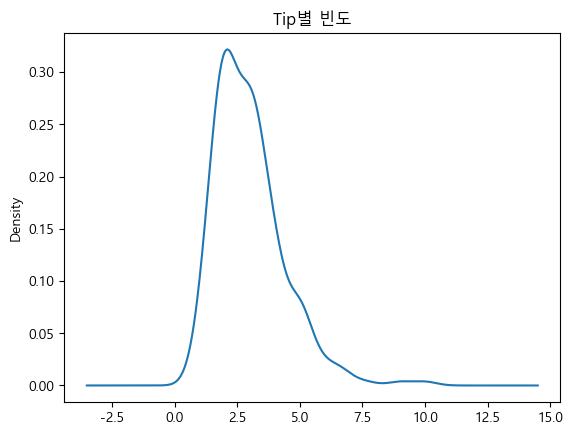

In [60]:
tip = tips['tip']

tip.plot(kind = 'kde', title = 'Tip별 빈도', xlabel = 'Tip', ylabel = '빈도')
plt.show()

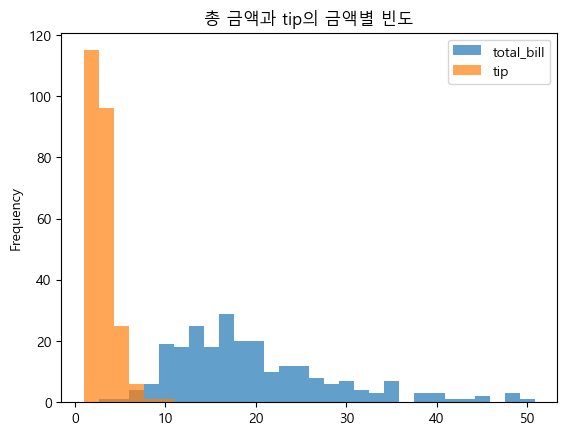

In [67]:
# 이번에는 total_bill과 tip을 같이 그려서 비교해보자.

total_bill_tip = tips[['total_bill', 'tip']]

total_bill_tip.plot(kind = 'hist', bins = 30, title = '총 금액과 tip의 금액별 빈도', xlabel = '금액 ($)', ylabel = '빈도', alpha = 0.7)
plt.show()

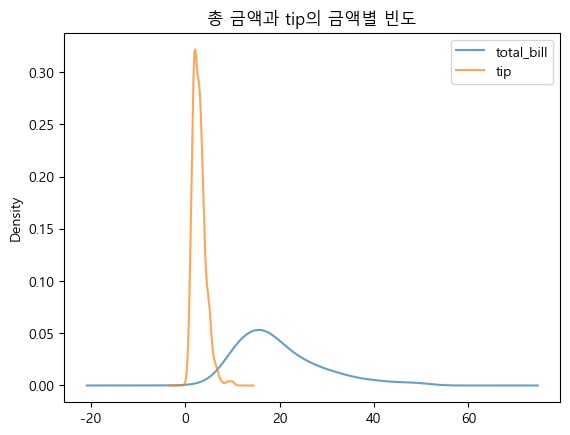

In [68]:
total_bill_tip = tips[['total_bill', 'tip']]

total_bill_tip.plot(kind = 'kde', title = '총 금액과 tip의 금액별 빈도', xlabel = '금액 ($)', ylabel = '빈도', alpha = 0.7)
plt.show()

## 1.5. Boxplot (상자그래프)

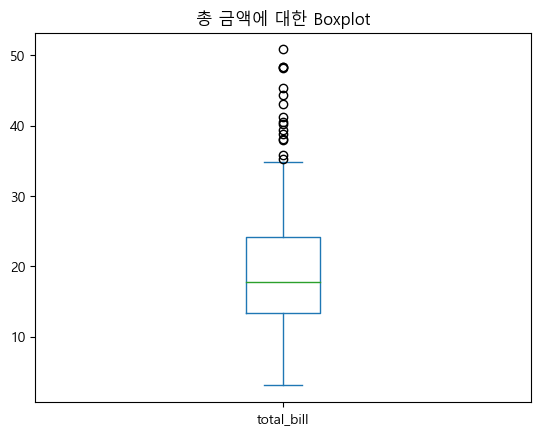

In [72]:
total_bill = tips['total_bill']

total_bill.plot(kind = 'box', whis = 1, title = '총 금액에 대한 Boxplot')
plt.show()

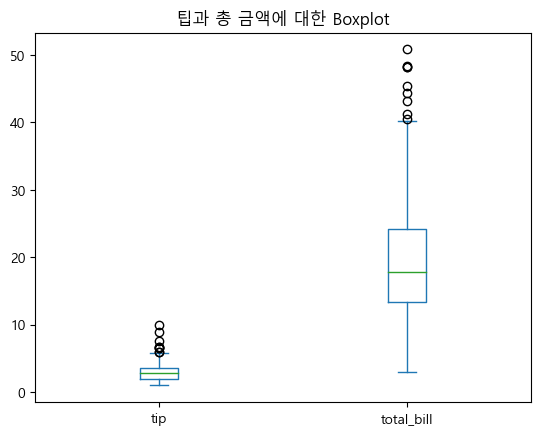

In [74]:
tip_total_bill = tips[['tip', 'total_bill']]

tip_total_bill.plot(kind = 'box', title = '팁과 총 금액에 대한 Boxplot')
plt.show()

## 1.6. scatter plot (산점도) 

In [ ]:
# 지금까지는 하나의 column에 대해서만 그래프를 그렸다. 하지만 Scatter Plot은 두 개의 column에 대해 그래프를 그려야 한다.
# 이 점에 주의하자.

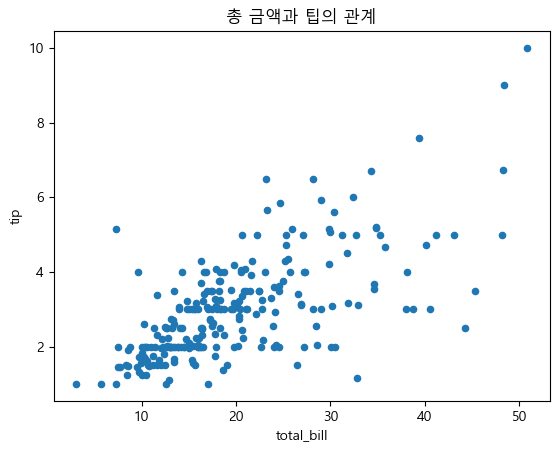

In [12]:
tips.plot(kind = 'scatter', x = 'total_bill', y = 'tip', title = '총 금액과 팁의 관계')
plt.show()

In [77]:
tips[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


## 1.7. Line Plot

In [13]:
# line plot에 사용할 data를 불러온다.

import pandas as pd

df = pd.read_excel('data/강수량.xlsx')
df = df.set_index('계절').T

In [14]:
df

계절,봄,여름,가을,겨울
2009,231.3,752.0,143.1,142.3
2010,302.9,692.6,307.6,98.7
2011,256.9,1053.6,225.5,45.6
2012,256.5,770.6,363.5,139.3
2013,264.3,567.5,231.2,59.9
2014,215.9,599.8,293.1,76.9
2015,223.2,387.1,247.7,109.1
2016,312.8,446.2,381.6,108.1
2017,118.6,609.7,172.5,75.6


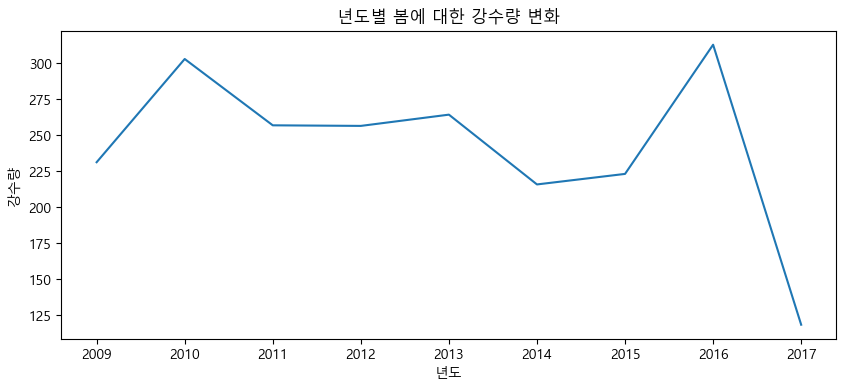

In [20]:
# 보통 data를 생성할 때 DataFrame의 index에 변화의 기준을 두고 value에 변화량을 둔다.
# 이에 맞게 설정한 뒤 lineplot을 그려보자.
# 이때 plot()의 parameter kind는 'line'을 기본값으로 가진다.

# 먼저 년도별 봄에 대한 강수량 변화를 그려보자.

df['봄'].plot(kind = 'line', figsize  = (10, 4), xlabel = '년도', ylabel = '강수량', title = '년도별 봄에 대한 강수량 변화')

plt.show()

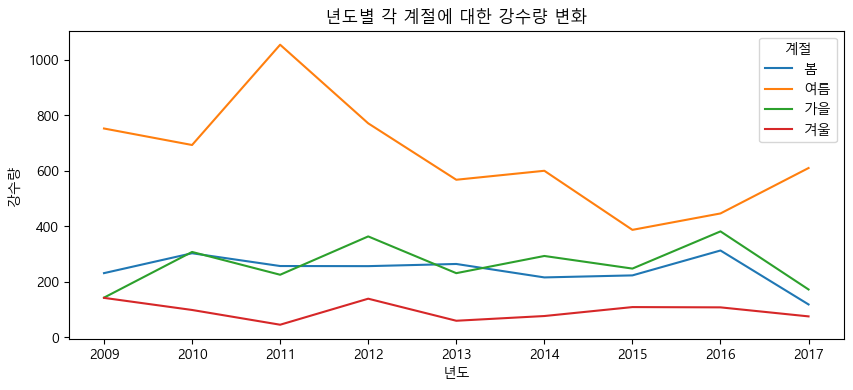

In [23]:
# DataFrame_instance.plot()을 실행할 시 index가 x축에 오고 column 별로 선 그래프를 그린다.
# 아래 코드는 년도별 각 계절에 대한 강수량 변화인 것이다.

df.plot(figsize = (10, 4), xlabel = '년도', ylabel = '강수량', title = '년도별 각 계절에 대한 강수량 변화')
plt.show()

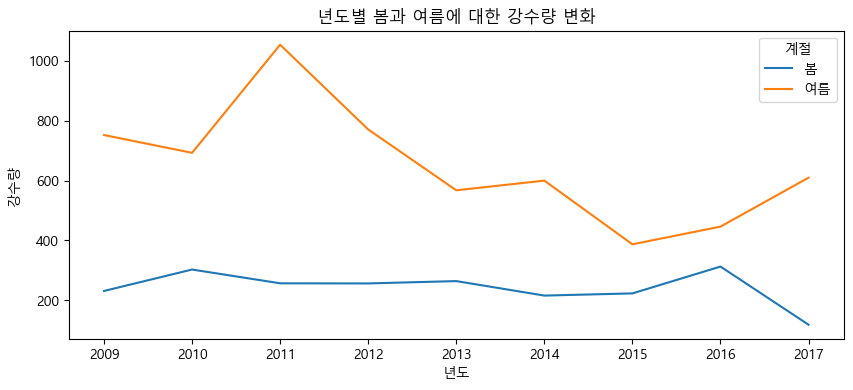

In [22]:
# 이를 응용하면 DataFrame으로부터 원하는 column만 불러와 이에 대한 그래프를 그릴 수도 있다.
# 아래 코드는 년도별 봄과 여름에 대한 강수량 변화 그래프를 그린다.

df[['봄', '여름']].plot(figsize = (10, 4), xlabel = '년도', ylabel = '강수량', title = '년도별 봄과 여름에 대한 강수량 변화')

plt.show()